Zomato Project

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [8]:
dataframe.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [9]:
dataframe.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

From the above method we conclude that there is no null values in our dataset.

In [13]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe)
    
    

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

Text(0.5, 0, 'Type of Restaurant')

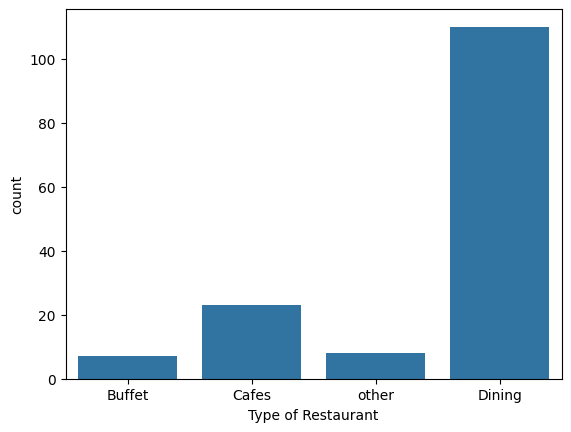

In [15]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurant")

From the above graph we conclude that majority of the restaurant falls in Dining Category


Text(0, 0.5, 'Votes')

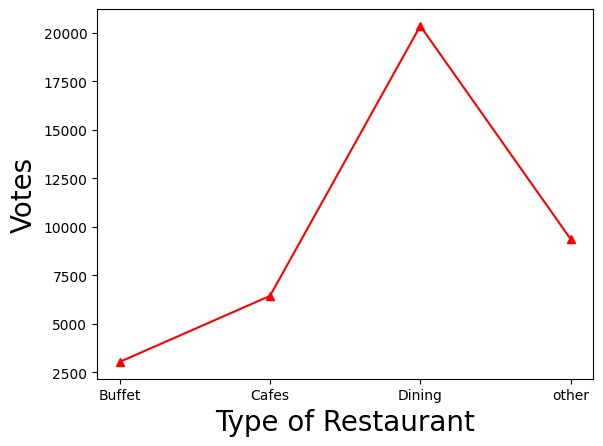

In [21]:
group_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':group_data})
plt.plot(result, color = 'red', marker='^')
plt.xlabel("Type of Restaurant",color="black",size = 20)
plt.ylabel("Votes",color= "black", size = 20)


From the above graph we conclude that Dining Restaurant had received maximum number of votes 

In [25]:
dataframe        

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


Text(0.5, 1.0, 'Rate Distribution')

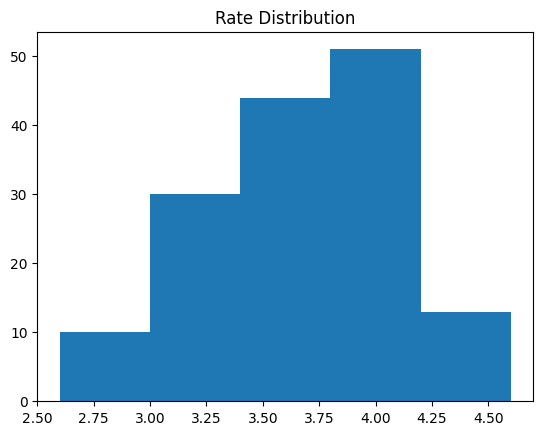

In [28]:
plt.hist(dataframe['rate'], bins = 5)
plt.title("Rate Distribution")
         

From the above graph we conclude that majority restarunt recieves ratings from 3.5 to 4.0 

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

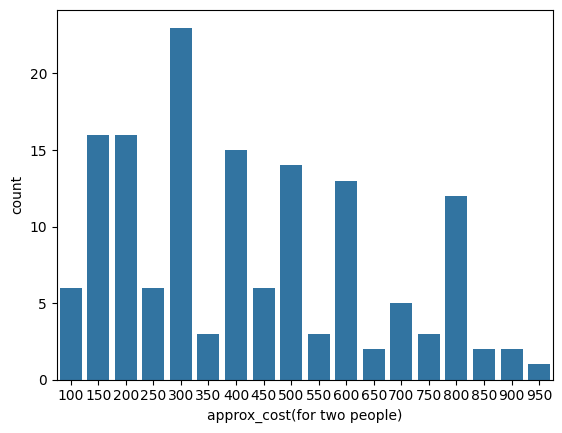

In [29]:
sns.countplot(x = dataframe['approx_cost(for two people)'])


From the above graph we conclude that majority of couples prefer restaurant with approximate cost of 300 rupees. 

<Axes: xlabel='online_order', ylabel='rate'>

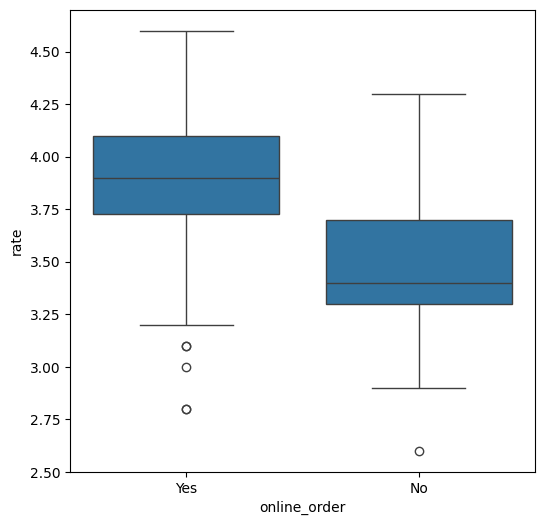

In [30]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order' , y = 'rate' , data = dataframe)

From the above graph we conclude that offline orders recieved lower rating as compared to online orders. 

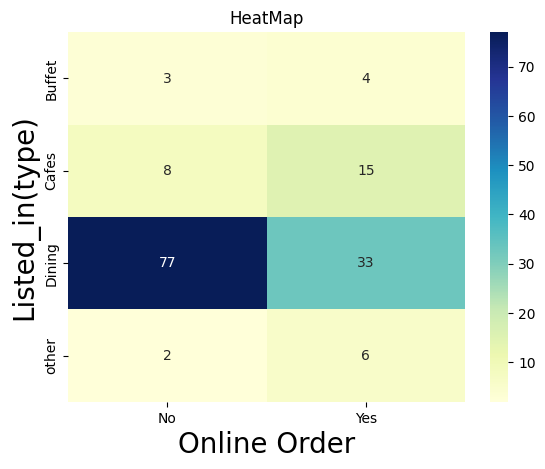

In [34]:
pivot_table = dataframe.pivot_table(index = 'listed_in(type)', columns = 'online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap = "YlGnBu" , fmt = 'd')
plt.title("HeatMap")
plt.xlabel("Online Order",size=20)
plt.ylabel("Listed_in(type)", size = 20)
plt.show()


In [ ]:
Conclusion = Dining Restaurant prefer offline orders, cafes receives online orders more . This means that client prefer to place orders in person at 
restaurant , but prefer online ordering at cafes. 
